# Purpose
In previous derivations we used α=0 when the pendulum is down (at rest), in the Qube software we use α=0 when the pendulum is inverted.
Here we change the equations to match the physical Qube

In [1]:
from __future__ import absolute_import, print_function, division
import numpy as np
from sympy import *

# Create symbolic vars

In [2]:
alpha, theta, alpha_dot, theta_dot, alpha_dot_dot, theta_dot_dot = symbols('α θ α′  θ′  α′′ θ′′')
rm, kt, km, mr, Lr, Jr, Dr, mp, Lp, Jp, Dp, g, tau = symbols('rm kt km mr Lr Jr Dr mp Lp Jp Dp g τ')

In [3]:
init_printing(use_unicode=True)

In [4]:
alpha_dot_dot = simplify((2.0*Lp*Lr*mp*(4.0*Dr*theta_dot + Lp**2*alpha_dot*mp*theta_dot*sin(2.0*alpha) + 2.0*Lp*Lr*alpha_dot**2*mp*(-sin(alpha)) - 4.0*tau)*(-cos(alpha)) - 0.5*(4.0*Jr + Lp**2*mp*(-sin(alpha))**2 + 4.0*Lr**2*mp)*(-8.0*Dp*alpha_dot + Lp**2*mp*theta_dot**2*sin(2.0*alpha) + 4.0*Lp*g*mp*(-sin(alpha))))/(4.0*Lp**2*Lr**2*mp**2*(-cos(alpha))**2 - (4.0*Jp + Lp**2*mp)*(4.0*Jr + Lp**2*mp*(-sin(alpha))**2 + 4.0*Lr**2*mp)))
theta_dot_dot = simplify((-Lp*Lr*mp*(-8.0*Dp*alpha_dot + Lp**2*mp*theta_dot**2*sin(2.0*alpha) + 4.0*Lp*g*mp*(-sin(alpha)))*(-cos(alpha)) + (4.0*Jp + Lp**2*mp)*(4.0*Dr*theta_dot + Lp**2*alpha_dot*mp*theta_dot*sin(2.0*alpha) + 2.0*Lp*Lr*alpha_dot**2*mp*(-sin(alpha)) - 4.0*tau))/(4.0*Lp**2*Lr**2*mp**2*(-cos(alpha))**2 - (4.0*Jp + Lp**2*mp)*(4.0*Jr + Lp**2*mp*(-sin(alpha))**2 + 4.0*Lr**2*mp)))


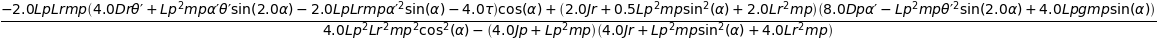

In [5]:
alpha_dot_dot

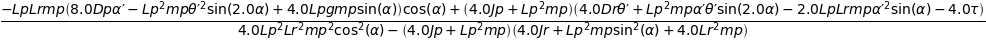

In [6]:
theta_dot_dot

In [7]:
# Make everything easy to copy into python code

print_theta_dot_dot = str(theta_dot_dot)
print_theta_dot_dot = print_theta_dot_dot.replace('′', '_dot')
print_theta_dot_dot = print_theta_dot_dot.replace('α', 'alpha')
print_theta_dot_dot = print_theta_dot_dot.replace('θ', 'theta')
print_theta_dot_dot = print_theta_dot_dot.replace('τ', 'tau')
print_theta_dot_dot = print_theta_dot_dot.replace('sin', 'np.sin')
print_theta_dot_dot = print_theta_dot_dot.replace('cos', 'np.cos')

print_alpha_dot_dot = str(alpha_dot_dot)
print_alpha_dot_dot = print_alpha_dot_dot.replace('′', '_dot')
print_alpha_dot_dot = print_alpha_dot_dot.replace('α', 'alpha')
print_alpha_dot_dot = print_alpha_dot_dot.replace('θ', 'theta')
print_alpha_dot_dot = print_alpha_dot_dot.replace('τ', 'tau')
print_alpha_dot_dot = print_alpha_dot_dot.replace('sin', 'np.sin')
print_alpha_dot_dot = print_alpha_dot_dot.replace('cos', 'np.cos')

print('theta_dot_dot =', print_theta_dot_dot)
print('alpha_dot_dot =', print_alpha_dot_dot)

theta_dot_dot = (-Lp*Lr*mp*(8.0*Dp*alpha_dot - Lp**2*mp*theta_dot**2*np.sin(2.0*alpha) + 4.0*Lp*g*mp*np.sin(alpha))*np.cos(alpha) + (4.0*Jp + Lp**2*mp)*(4.0*Dr*theta_dot + Lp**2*mp*alpha_dot*theta_dot*np.sin(2.0*alpha) - 2.0*Lp*Lr*mp*alpha_dot**2*np.sin(alpha) - 4.0*tau))/(4.0*Lp**2*Lr**2*mp**2*np.cos(alpha)**2 - (4.0*Jp + Lp**2*mp)*(4.0*Jr + Lp**2*mp*np.sin(alpha)**2 + 4.0*Lr**2*mp))
alpha_dot_dot = (-2.0*Lp*Lr*mp*(4.0*Dr*theta_dot + Lp**2*mp*alpha_dot*theta_dot*np.sin(2.0*alpha) - 2.0*Lp*Lr*mp*alpha_dot**2*np.sin(alpha) - 4.0*tau)*np.cos(alpha) + (2.0*Jr + 0.5*Lp**2*mp*np.sin(alpha)**2 + 2.0*Lr**2*mp)*(8.0*Dp*alpha_dot - Lp**2*mp*theta_dot**2*np.sin(2.0*alpha) + 4.0*Lp*g*mp*np.sin(alpha)))/(4.0*Lp**2*Lr**2*mp**2*np.cos(alpha)**2 - (4.0*Jp + Lp**2*mp)*(4.0*Jr + Lp**2*mp*np.sin(alpha)**2 + 4.0*Lr**2*mp))


# Compare to the previous solution

In [8]:
alpha_old = symbols('alpha_old')
alpha_old = alpha + pi

In [9]:
alpha_dot_dot_old = (2.0*Lp*Lr*mp*(4.0*Dr*theta_dot + Lp**2*alpha_dot*mp*theta_dot*sin(2.0*alpha_old) + 2.0*Lp*Lr*alpha_dot**2*mp*sin(alpha_old) - 4.0*tau)*cos(alpha_old) - 0.5*(4.0*Jr + Lp**2*mp*sin(alpha_old)**2 + 4.0*Lr**2*mp)*(-8.0*Dp*alpha_dot + Lp**2*mp*theta_dot**2*sin(2.0*alpha_old) + 4.0*Lp*g*mp*sin(alpha_old)))/(4.0*Lp**2*Lr**2*mp**2*cos(alpha_old)**2 - (4.0*Jp + Lp**2*mp)*(4.0*Jr + Lp**2*mp*sin(alpha_old)**2 + 4.0*Lr**2*mp))
theta_dot_dot_old = (-Lp*Lr*mp*(-8.0*Dp*alpha_dot + Lp**2*mp*theta_dot**2*sin(2.0*alpha_old) + 4.0*Lp*g*mp*sin(alpha_old))*cos(alpha_old) + (4.0*Jp + Lp**2*mp)*(4.0*Dr*theta_dot + Lp**2*alpha_dot*mp*theta_dot*sin(2.0*alpha_old) + 2.0*Lp*Lr*alpha_dot**2*mp*sin(alpha_old) - 4.0*tau))/(4.0*Lp**2*Lr**2*mp**2*cos(alpha_old)**2 - (4.0*Jp + Lp**2*mp)*(4.0*Jr + Lp**2*mp*sin(alpha_old)**2 + 4.0*Lr**2*mp))


# Check if the new equation is equal to the old

In [10]:
simplify(alpha_dot_dot - alpha_dot_dot_old)

In [12]:
simplify(theta_dot_dot - theta_dot_dot_old)